# Data Exploration

In [1]:
import sklearn
import numpy as np
from numpy import array  
from numpy.linalg import norm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from random import randrange
import math
import random
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_original = pd.read_csv("X.csv") #Original Data
X = X_original.to_numpy()  #to an array

t_original = pd.read_csv("T.csv") #Original Data
t = t_original.to_numpy()  #to an array



The data consists of the times recorded by the sensors and the position where the pencil lead breakage occurred. The input consists of the times recorded by 11 sensors, and our target is the X, Z positions. We aim to perform regression to predict the X, Z positions of the test.

* X_train: We have a 56x11 matrix representing the 56 P-wave times recorded by the 11 sensors.
* T_train: We have a 56x2 matrix representing the known X, Y coordinates





# Training

### Scaling the data

In [2]:
X= StandardScaler().fit_transform(X)

## Splitting the Training Set into Training and Validation
Before training our machine learning model, it's essential to split the dataset into training and validation sets. This allows us to assess the model's performance on unseen data and avoid overfitting. A typical split ratio is often chosen, such as 80% of the data for training and 20% for validation.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2,random_state=42) 

## Using SVM

We search for the best hyperparameters for the model through Cross-Validation

In [4]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe_svr = Pipeline([('scl', StandardScaler()),
        ('reg', MultiOutputRegressor(SVR()))])

grid_param_svr = {
    'reg__estimator__C': np.arange(10,1000,10),
    'reg__estimator__epsilon': np.arange(0.1,10.0,0.1)
    
}

gs_svr = (GridSearchCV(estimator=pipe_svr, 
                      param_grid=grid_param_svr, 
                      cv=5,
                      scoring = 'neg_mean_squared_error',
                      n_jobs = -1))

gs_svr = gs_svr.fit(X_train,t_train)
gs_svr.best_estimator_    

Pipeline(steps=[('scl', StandardScaler()),
                ('reg',
                 MultiOutputRegressor(estimator=SVR(C=320,
                                                    epsilon=2.3000000000000003)))])

We train the algorithm on X

In [5]:
model_svm=gs_svr.best_estimator_    
t_train_predictSVM= model_svm.predict(X_train)

We evaluate the algorithm's performance

In [6]:
mse_x_train_SVM = mean_squared_error(t_train, t_train_predictSVM)
print(f'MSE for train: {mse_x_train_SVM}')

MSE for train: 58.43617626459967



We plot the predictions on the training set

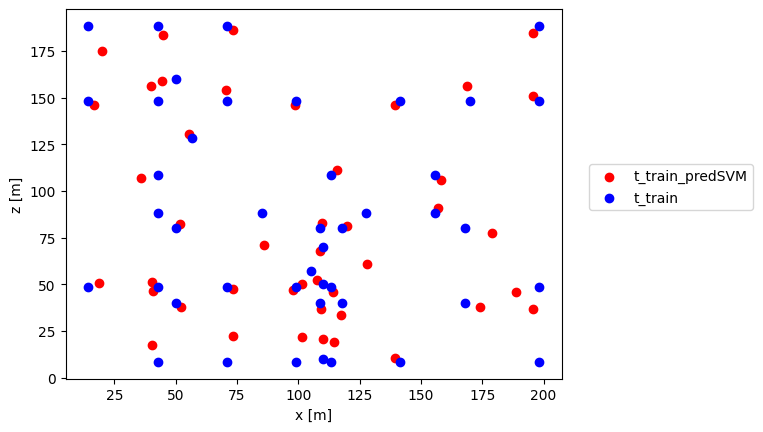

In [7]:
plt.scatter(t_train_predictSVM[:,0],t_train_predictSVM[:,1],color='red', marker='o', label='t_train_pred')
plt.scatter(t_train[:,0],t_train[:,1],color='blue', marker='o', label='t_train')
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.legend(["t_train_predSVM","t_train"],
           bbox_to_anchor = (1.4, 0.6))

##  Using Ridge Regression

In [8]:
# Finding the best polynomial by incorporating Ridge Regularization
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def ridge(m, lam):
    return Pipeline([('poly_features', PolynomialFeatures(degree=m)),
                     ('regressor', Ridge(alpha=lam/2.0, fit_intercept=False))])

# Fit Ridge con polinomio 10 y alpha seleccionado
#model_ridge = ridge(10, 0.0002782559402207126)
model_ridge = ridge(10, 0.01)
model_ridge.fit(X_train, t_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=10)),
                ('regressor', Ridge(alpha=0.005, fit_intercept=False))])

In [9]:
# We train the algorithm on X  
t_train_predictridge= model_ridge.predict(X_train)

In [10]:
# We evaluate the algorithm's performance
mse_x_train_ridge = mean_squared_error(t_train, t_train_predictridge)
print(f'MSE for train: {mse_x_train_ridge}')

MSE for train: 0.013281605367386446


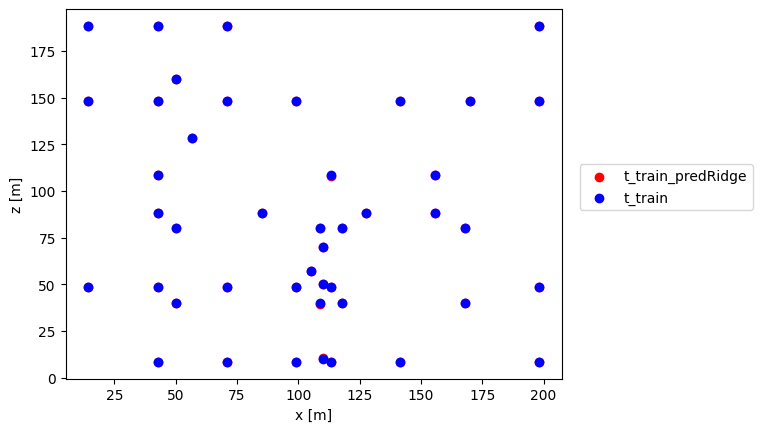

In [11]:
# We plot the predictions on the training set
plt.scatter(t_train_predictridge[:,0],t_train_predictridge[:,1],color='red', marker='o', label='t_train_pred')
plt.scatter(t_train[:,0],t_train[:,1],color='blue', marker='o', label='t_train')
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.legend(["t_train_predRidge","t_train"],
           bbox_to_anchor = (1.4, 0.6))

## Using Decision Tree Regression

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

#modelo_dt = DecisionTreeRegressor(max_depth=2)
dt = DecisionTreeRegressor()

parametros={'max_depth':[2,3,5,7,10],'min_samples_leaf':list(range(1, 40))}
grid_dt=GridSearchCV(dt,parametros,cv=10,scoring='neg_mean_squared_error')
grid_dt.fit(X_train,t_train)
grid_dt.best_estimator_ 

DecisionTreeRegressor(max_depth=10)

In [13]:
# We train the algorithm on X  
model_dt=grid_dt.best_estimator_    
t_train_predictDT= model_dt.predict(X_train)

In [14]:
# We evaluate the algorithm's performance
mse_x_train_DT = mean_squared_error(t_train, t_train_predictDT)
print(f'MSE for train: {mse_x_train_DT}')

MSE for train: 0.0


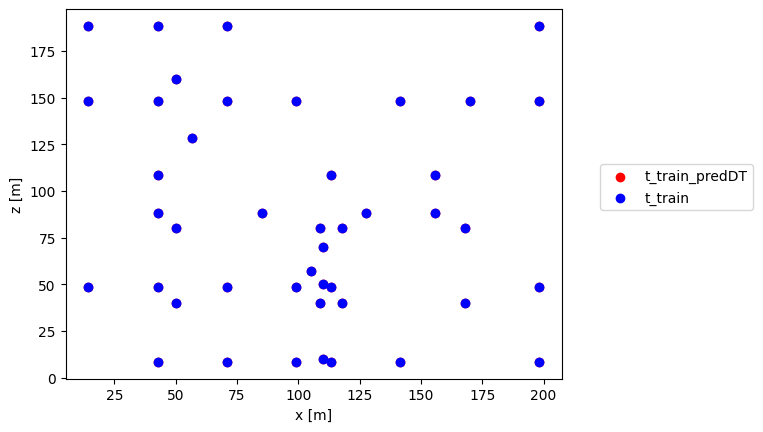

In [15]:
## We plot the predictions on the training set
plt.scatter(t_train_predictDT[:,0],t_train_predictDT[:,1],color='red', marker='o', label='t_train_pred')
plt.scatter(t_train[:,0],t_train[:,1],color='blue', marker='o', label='t_train')
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.legend(["t_train_predDT","t_train"],
           bbox_to_anchor = (1.4, 0.6))

## Metrics Train Comparation

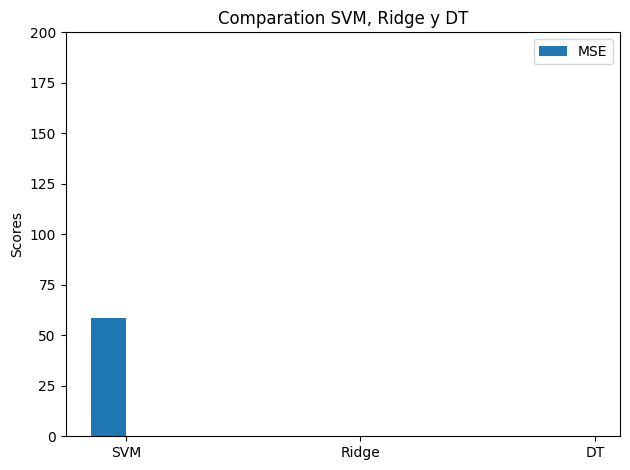

MSE for train SVM: 58.43617626459967
MSE for train Ridge: 0.013281605367386446
MSE for train DT: 0.0


In [16]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
  
labels = ['SVM', 'Ridge', 'DT']
MSE = [mse_x_train_SVM, mse_x_train_ridge,mse_x_train_DT]


x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, MSE, width, label='MSE')
ax.set_ylim(ymin=0,ymax=200)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparation SVM, Ridge y DT')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

print(f'MSE for train SVM: {mse_x_train_SVM}')
print(f'MSE for train Ridge: {mse_x_train_ridge}')
print(f'MSE for train DT: {mse_x_train_DT}')


According to the results on the training set, the model that performs the best on this dataset is the Ridge Regression model.

# Test

Now we test with data that the model has not seen before. This way, we choose the best model based on its performance on unseen data

In [17]:
#We plot the predictions on the test set
t_test_predictSVM= model_svm.predict(X_test)
t_test_predictRidge= model_ridge.predict(X_test)
t_test_predictDT= model_dt.predict(X_test)

In [18]:
#Test evaluation

mse_x_test_SVM = mean_squared_error(t_test, t_test_predictSVM)
mse_x_test_Ridge = mean_squared_error(t_test, t_test_predictRidge)
mse_x_test_DT = mean_squared_error(t_test, t_test_predictDT)
print(f'MSE for test SVM: {mse_x_test_SVM}')
print(f'MSE for test Ridge: {mse_x_test_Ridge}')
print(f'MSE for test DT: {mse_x_test_DT}')

MSE for test SVM: 54.52537001189974
MSE for test Ridge: 79087.29506009597
MSE for test DT: 564.2701678556317


# Conclutions

The SVM model's metric remains consistent in both the training and testing sets. The Ridge model overfits completely, resulting in poor performance on the testing set. The Decision Tree model increased the error on the testing set. It is evident that, initially, the best regression type for this dataset is SVM. Improving its metric likely requires more data and better performance optimization. This is a significant advancement initially, as this tool can be extremely useful for quickly identifying the location zone of Acoustic Emissions (EA).

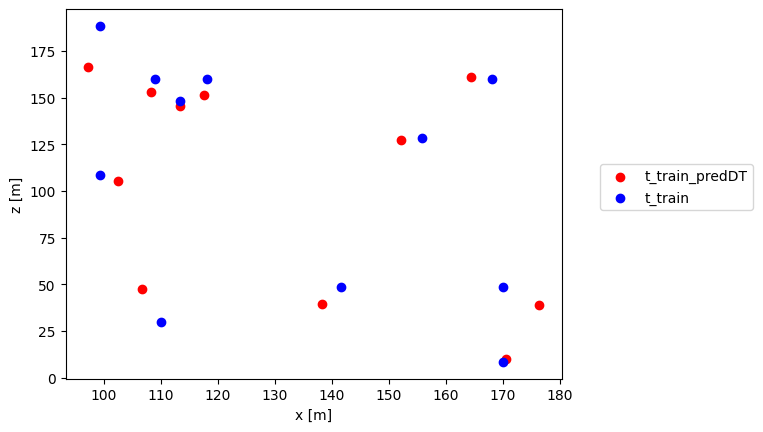

In [19]:
plt.scatter(t_test_predictSVM[:,0],t_test_predictSVM[:,1],color='red', marker='o')
plt.scatter(t_test[:,0],t_test[:,1],color='blue', marker='o')
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.legend(["t_train_predDT","t_train"],
           bbox_to_anchor = (1.4, 0.6))

# Additional (Input Rock Breakage Test)

As I also had data from a breakage test performed on the top of the granite block, I wanted to test the model with this data. Although I don't have the real positions, it is quite satisfying if the locations are observed along the upper edge of the granite. A total of 96 Acoustic Emission events were recorded during the test. For each of these events, the arrival time of the P-wave was recorded.

In [22]:
X_original_test = pd.read_csv("x_ensayo.csv") #orignal data
X_test = X_original_test.to_numpy()  #to an array
X_test = StandardScaler().fit_transform(X_test)
t_test_predicttest= model_svm.predict(X_test)

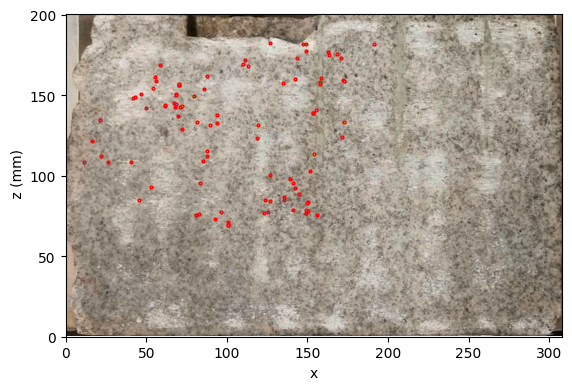

In [21]:
# We plot on the image

from PIL import Image
import math 

im = Image.open('muestra_despues_ensayo.jpg')
L= 218
H= 200
scle = 2
img = im.resize((924, 600))
plt.axes().set_aspect('equal')
plt.imshow(img)

x=t_test_predicttest[:,0]
z=t_test_predicttest[:,1]
y=L-x

N = len(x)
labelsx = ['0','50','100','150','200','250','300']
labelsy= ['200','150','100','50','0']
for i in range(N):

    x_on_fault = scle*(L+x[i]-y[i])/2
    dist_on_fault = math.sqrt(2)*(scle*L-x_on_fault)
    depth_on_fault = scle*H-scle*z[i]
    plt.plot(dist_on_fault,depth_on_fault,marker="o",ms = 2, mec = 'r')
    plt.xlabel("x")
    plt.ylabel(" z (mm)")
    plt.xticks(([0,150,300,450,600,750,900]),labelsx)
    plt.yticks(([0,150,300,450,600]), labelsy)

It can be observed that the locations are along the edge. These results leave me highly satisfied with this initial approach